# 1. Install necessary libraries

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 13.1 MB/s eta 0:00:00


In [ ]:
pip install xgboost

In [ ]:
pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/OULAD_analysis/'

# 2. Load the OULAD dataset

In [ ]:
assess = pd.read_csv(path + 'assessments.csv')
course = pd.read_csv(path + 'courses.csv')
stdAssess = pd.read_csv(path + 'studentAssessment.csv')
stdInfo = pd.read_csv(path + 'studentInfo.csv')
stdReg = pd.read_csv(path + 'studentRegistration.csv')
stdVle = pd.read_csv(path + 'studentVle.csv')
vle = pd.read_csv(path + 'vle.csv')

# 3. Data Preprocessing & Preparation

## StudentInfo dataset

In [ ]:
stdInfo['final_result'] = np.where(stdInfo['final_result'] == 'Withdrawn', 1, 0)

In [ ]:
cluster_stdInfo = stdInfo.copy()

Clustering

In [ ]:
from kmodes.kprototypes import KPrototypes

# Assume df is already loaded and contains the required columns
categorical_columns = ['gender', 'highest_education', 'imd_band', 'age_band', 'disability', 'region', 'final_result']
numerical_columns = ['num_of_prev_attempts', 'studied_credits']

# Convert categorical columns to category dtypes
for col in categorical_columns:
    cluster_stdInfo[col] = cluster_stdInfo[col].astype('category')

# Creating a copy of the data for clustering that excludes the key columns
clustering_data = cluster_stdInfo[categorical_columns + numerical_columns].copy()
clustering_data[categorical_columns] = clustering_data[categorical_columns].apply(lambda x: x.cat.codes)

# Convert the DataFrame to a NumPy array
data_matrix = clustering_data.to_numpy()

In [ ]:
kproto = KPrototypes(n_clusters=5, init='Cao', n_init=5, verbose=1)

clusters = kproto.fit_predict(data_matrix, categorical=[clustering_data.columns.get_loc(c) for c in categorical_columns])

cluster_stdInfo['Cluster'] = clusters

print(cluster_stdInfo[['id_student', 'code_module', 'code_presentation', 'Cluster']].head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 864, ncost: 6279813.341271607
Run: 1, iteration: 2/100, moves: 12, ncost: 6279720.650921196
Run: 1, iteration: 3/100, moves: 2, ncost: 6279719.449032368
Run: 1, iteration: 4/100, moves: 0, ncost: 6279719.449032368
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 124, ncost: 6279719.680265364
Run: 2, iteration: 2/100, moves: 0, ncost: 6279719.680265364
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 95, ncost: 12191951.438000306
Run: 3, iteration: 2/1

In [ ]:
cluster_stdInfo[['id_student','code_module','code_presentation','Cluster']]

,id_student,code_module,code_presentation,Cluster
0,11391,AAA,2013J,3
1,28400,AAA,2013J,0
2,30268,AAA,2013J,0
3,31604,AAA,2013J,0
4,32885,AAA,2013J,0
...,...,...,...,...
32588,2640965,GGG,2014J,4
32589,2645731,GGG,2014J,4
32590,2648187,GGG,2014J,4
32591,2679821,GGG,2014J,4


In [ ]:
cluster_stdInfo[['Cluster']].value_counts()

Cluster
0          16964
1           7213
4           3792
2           3237
3           1387
Name: count, dtype: int64

In [ ]:
cluster_stdInfo['Cluster'].dtypes

dtype('O')

In [ ]:
cluster_stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code_module           32593 non-null  object  
 1   code_presentation     32593 non-null  object  
 2   id_student            32593 non-null  int64   
 3   gender                32593 non-null  object  
 4   highest_education     32593 non-null  object  
 5   imd_band              32593 non-null  object  
 6   age_band              32593 non-null  object  
 7   num_of_prev_attempts  32593 non-null  int64   
 8   studied_credits       32593 non-null  int64   
 9   disability            32593 non-null  object  
 10  final_result          32593 non-null  category
 11  region                32593 non-null  object  
 12  Cluster               32593 non-null  object  
dtypes: category(1), int64(3), object(9)
memory usage: 3.0+ MB


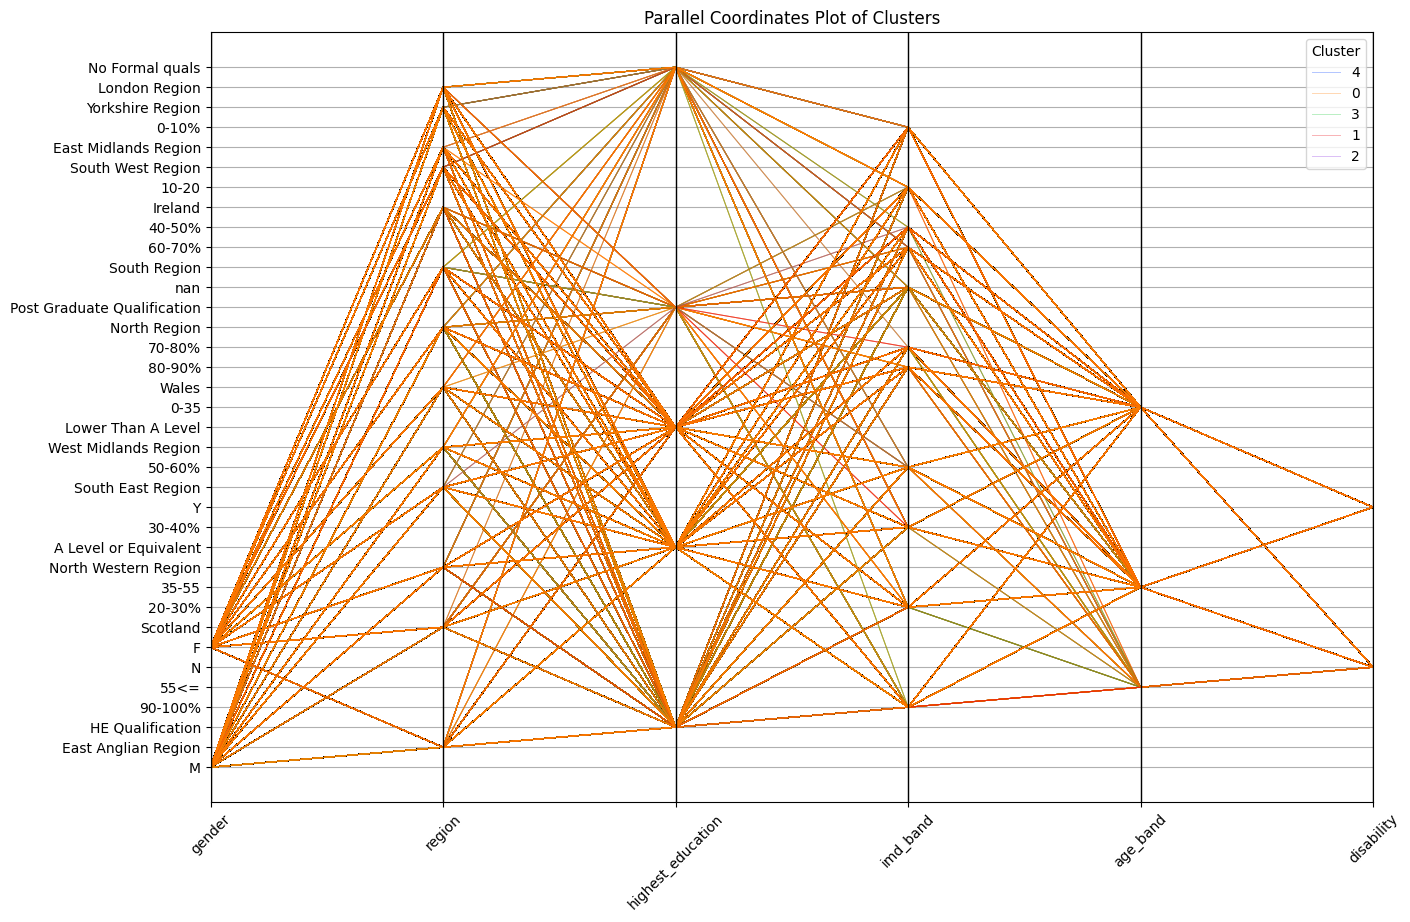

In [ ]:
# # Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates

cluster_stdInfo_sort = cluster_stdInfo[['gender','region','highest_education','imd_band','age_band','disability','Cluster']]

palette = sns.color_palette("bright", n_colors=5)

plt.figure(figsize=(15, 10))
parallel_coordinates(cluster_stdInfo_sort, 'Cluster', color=palette, alpha=0.3, linewidth=0.7)
plt.title('Parallel Coordinates Plot of Clusters')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
stdInfo.shape

(32593, 12)

In [ ]:
stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  int64  
 4   highest_education     32593 non-null  int64  
 5   imd_band              31482 non-null  float64
 6   age_band              32593 non-null  int64  
 7   num_of_prev_attempts  32593 non-null  int64  
 8   studied_credits       32593 non-null  int64  
 9   disability            32593 non-null  int64  
 10  final_result          32593 non-null  int64  
 11  region                32593 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 3.0+ MB


In [ ]:
cluster_stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   highest_education     32593 non-null  object
 5   imd_band              32593 non-null  object
 6   age_band              32593 non-null  object
 7   num_of_prev_attempts  32593 non-null  int64 
 8   studied_credits       32593 non-null  int64 
 9   disability            32593 non-null  object
 10  final_result          32593 non-null  int64 
 11  region                32593 non-null  object
 12  Cluster               32593 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
merge_cluster = pd.merge(stdInfo, cluster_stdInfo, how='left', on=['id_student','code_module','code_presentation','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','final_result'])

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
merge_cluster

NameError: name 'merge_cluster' is not defined

In [ ]:
merge_cluster.info()

NameError: name 'merge_cluster' is not defined

In [ ]:
stdInfo.info()

In [ ]:
stdInfo = merge_cluster

NameError: name 'merge_cluster' is not defined

In [ ]:
stdInfo.groupby('region')[['final_result']].mean()

,final_result
region,
East Anglian Region,0.301198
East Midlands Region,0.347569
Ireland,0.230574
London Region,0.345149
North Region,0.315414
North Western Region,0.355816
Scotland,0.263204
South East Region,0.307437
South Region,0.300129


In [ ]:
region = stdInfo.groupby('region')[['final_result']].mean()
stdInfo = pd.merge(stdInfo, region, how='left', on='region')
stdInfo = stdInfo.drop('region', axis=1)
stdInfo = stdInfo.rename(columns={'final_result_x': 'final_result', 'final_result_y': 'region'})
stdInfo

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region
0,AAA,2013J,11391,M,HE Qualification,90-100%,55<=,0,240,N,0,0.301198
1,AAA,2013J,28400,F,HE Qualification,20-30%,35-55,0,60,N,0,0.263204
2,AAA,2013J,30268,F,A Level or Equivalent,30-40%,35-55,0,60,Y,1,0.355816
3,AAA,2013J,31604,F,A Level or Equivalent,50-60%,35-55,0,60,N,0,0.307437
4,AAA,2013J,32885,F,Lower Than A Level,50-60%,0-35,0,60,N,0,0.353602
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Lower Than A Level,10-20,0-35,0,30,N,0,0.251198
32589,GGG,2014J,2645731,F,Lower Than A Level,40-50%,35-55,0,30,N,0,0.301198
32590,GGG,2014J,2648187,F,A Level or Equivalent,20-30%,0-35,0,30,Y,0,0.300129
32591,GGG,2014J,2679821,F,Lower Than A Level,90-100%,35-55,0,30,N,1,0.307437


In [ ]:
stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   highest_education     32593 non-null  object 
 5   imd_band              31482 non-null  object 
 6   age_band              32593 non-null  object 
 7   num_of_prev_attempts  32593 non-null  int64  
 8   studied_credits       32593 non-null  int64  
 9   disability            32593 non-null  object 
 10  final_result          32593 non-null  int64  
 11  region                32593 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.0+ MB


In [ ]:
stdInfo['gender'].value_counts()

gender
M    17875
F    14718
Name: count, dtype: int64

In [ ]:
stdInfo['gender'] = stdInfo['gender'].replace({'M': 1, 'F': 0})
stdInfo['highest_education'] = stdInfo['highest_education'].replace({'A Level or Equivalent': 0, 'Lower Than A Level': 1, 'HE Qualification': 2, 'No Formal quals': 3, 'Post Graduate Qualification': 4})
stdInfo['imd_band'] = stdInfo['imd_band'].replace({'0-10%': 0, '10-20' : 1, '20-30%': 2, '30-40%': 3, '40-50%': 4, '50-60%': 5, '60-70%': 6, '70-80%': 7, '80-90%': 8, '90-100%': 9})
stdInfo['age_band'] = stdInfo['age_band'].replace({'0-35': 0, '35-55': 1, '55<=': 2})
stdInfo['disability'] = stdInfo['disability'].replace({'N': 0, 'Y': 1})

In [ ]:
stdInfo.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region
0,AAA,2013J,11391,1,2,9.0,2,0,240,0,0,0.301198
1,AAA,2013J,28400,0,2,2.0,1,0,60,0,0,0.263204
2,AAA,2013J,30268,0,0,3.0,1,0,60,1,1,0.355816
3,AAA,2013J,31604,0,0,5.0,1,0,60,0,0,0.307437
4,AAA,2013J,32885,0,1,5.0,0,0,60,0,0,0.353602


In [ ]:
stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  int64  
 4   highest_education     32593 non-null  int64  
 5   imd_band              31482 non-null  float64
 6   age_band              32593 non-null  int64  
 7   num_of_prev_attempts  32593 non-null  int64  
 8   studied_credits       32593 non-null  int64  
 9   disability            32593 non-null  int64  
 10  final_result          32593 non-null  int64  
 11  region                32593 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 3.0+ MB


## StudentVle dataset

In [ ]:
stdVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
stdVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

## Merge dataset (StudentInfo, StudentVle)
Didn't consider activity type to simplise the dataset

In [ ]:
stdInfo_stdVle = pd.merge(stdInfo, stdVle, how='left', on=['id_student','code_module','code_presentation']).sort_values(['id_student','code_module','code_presentation'])

In [ ]:
stdInfo_stdVle

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region,id_site,date,sum_click
3664366,DDD,2013J,3733,1,2,9.0,2,0,60,0,1,0.300129,NaN,NaN,NaN
180987,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877049.0,-23.0,1.0
180988,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877053.0,-23.0,16.0
180989,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877044.0,-23.0,1.0
180990,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877079.0,-23.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271303,FFF,2014J,2702660,0,1,5.0,0,0,240,0,1,0.345149,NaN,NaN,NaN
3664364,DDD,2013B,2707979,0,1,6.0,0,0,120,0,0,0.347569,NaN,NaN,NaN
3664365,DDD,2013B,2710343,1,1,0.0,0,0,60,0,0,0.355816,NaN,NaN,NaN
4725395,DDD,2014B,2710343,1,1,0.0,0,1,60,0,0,0.355816,NaN,NaN,NaN


In [ ]:
stdInfo_stdVle['id_student'].nunique()

28785

In [ ]:
stdInfo_stdVle['date'].isna().sum()

3365

In [ ]:
stdInfo_stdVle['date'].notnull().sum()

10655280

In [ ]:
stdInfo_stdVle.isna().sum()

code_module                  0
code_presentation            0
id_student                   0
gender                       0
highest_education            0
imd_band                601942
age_band                     0
num_of_prev_attempts         0
studied_credits              0
disability                   0
final_result                 0
region                       0
id_site                   3365
date                      3365
sum_click                 3365
dtype: int64

In [ ]:
stdInfo_stdVle = stdInfo_stdVle.dropna()
stdInfo_stdVle = stdInfo_stdVle.sort_values('id_student')

In [ ]:
stdInfo_stdVle.head()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,region,id_site,date,sum_click
180987,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877049.0,-23.0,1.0
181424,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877399.0,162.0,1.0
181425,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877030.0,163.0,4.0
181426,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877055.0,163.0,22.0
181427,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,0.263204,877054.0,163.0,7.0


In [ ]:
stdInfo_stdVle['id_student'].nunique()

25149

In [ ]:
stdInfo_stdVle[stdInfo_stdVle['code_module']=='BBB']['id_student'].nunique()

6431

In [ ]:
pivot_df = stdInfo_stdVle.pivot_table(
    index=['id_student','code_module','code_presentation','final_result','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'],
    columns='date',
    values='sum_click',
    aggfunc='sum'
).reset_index()

KeyError: 'Cluster'

In [ ]:
pivot_df.fillna(inplace=True, value=0)

In [ ]:
pivot_df

# 4. Data Modeling (TSF + RF = Meta-model)

## 4.1) Time Series data (Interactive data) - Time Series Forest model (TSF)

### Prepare the dataset

In [ ]:
ts_pivot_df = pivot_df.drop(['id_student','code_module','code_presentation','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'], axis=1)

In [ ]:
ts_pivot_df

In [ ]:
ts_pivot_df['final_result'].value_counts()

In [ ]:
ts_pivot_df.dtypes

### Modeling

In [ ]:
import pandas as pd
import numpy as np
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Identify time series columns (assuming they are all the columns with float type which represents days)
time_series_columns = ts_pivot_df.columns[ts_pivot_df.dtypes == 'float64']

# Reshape the DataFrame for sktime: transform each row's time series data into a 2D numpy array
X = np.array(ts_pivot_df[time_series_columns].apply(lambda row: row.values.reshape(1, -1), axis=1).tolist())

y = ts_pivot_df['final_result'].values  # target variable

In [ ]:
# # First, split into temp training and test set
# X_temp, X_test_ts, y_temp, y_test_ts = train_test_split(X, y, test_size=0.2, random_state=42)

# # Then split the temp training set into actual training and validation sets
# X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [ ]:
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train_ts.shape)
print(y_train_ts.shape)

In [ ]:
# print(X_val_ts.shape)
# print(y_val_ts.shape)

In [ ]:
print(X_test_ts.shape)
print(y_test_ts.shape)

In [ ]:
global ts_model

# Initialize the Time Series Forest classifier
ts_model = TimeSeriesForestClassifier(n_estimators=100, n_jobs=-1)

# Fit the model
ts_model.fit(X_train_ts, y_train_ts)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# # Predict on the validation set
# val_predictions = ts_model.predict(X_val_ts)
# val_accuracy = accuracy_score(y_val_ts, val_predictions)
# print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
# print(classification_report(y_val_ts, val_predictions))

# Predict on the test set
tsf_predictions = ts_model.predict(X_test_ts)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test_ts, tsf_predictions) * 100:.2f}%")
print(classification_report(y_test_ts, tsf_predictions))

Test Accuracy: 85.04%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5333
           1       0.67      0.76      0.71      1711

    accuracy                           0.85      7044
   macro avg       0.79      0.82      0.80      7044
weighted avg       0.86      0.85      0.85      7044



## 4.2) Categorical data (Student Demographic data) - Random Forest model

### Prepare the dataset

In [ ]:
cat_df = pivot_df[['id_student','code_module','code_presentation','final_result','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster']]

In [ ]:
cat_df

date,id_student,code_module,code_presentation,final_result,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Cluster
0,6516,AAA,2014J,0,1,0.263204,2,8.0,2,0,60,0,4
1,8462,DDD,2013J,1,1,0.345149,2,3.0,2,0,90,0,3
2,8462,DDD,2014J,1,1,0.345149,2,3.0,2,1,60,0,4
3,11391,AAA,2013J,0,1,0.301198,2,9.0,2,0,240,0,2
4,23629,BBB,2013B,0,0,0.301198,1,2.0,0,2,60,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,1,0.347569,1,6.0,0,0,120,0,0
28170,2698535,CCC,2014B,1,1,0.251198,1,5.0,0,0,60,0,4
28171,2698535,EEE,2013J,0,1,0.251198,1,5.0,0,0,60,0,4
28172,2698577,BBB,2014J,0,0,0.251198,1,5.0,1,0,60,0,4


In [ ]:
cat_df['id_student'].nunique()

25149

In [ ]:
cat_df.drop_duplicates(inplace=True)

<ipython-input-55-03482e14796c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop_duplicates(inplace=True)


In [ ]:
cat_df

date,id_student,code_module,code_presentation,final_result,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Cluster
0,6516,AAA,2014J,0,1,0.263204,2,8.0,2,0,60,0,4
1,8462,DDD,2013J,1,1,0.345149,2,3.0,2,0,90,0,3
2,8462,DDD,2014J,1,1,0.345149,2,3.0,2,1,60,0,4
3,11391,AAA,2013J,0,1,0.301198,2,9.0,2,0,240,0,2
4,23629,BBB,2013B,0,0,0.301198,1,2.0,0,2,60,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,1,0.347569,1,6.0,0,0,120,0,0
28170,2698535,CCC,2014B,1,1,0.251198,1,5.0,0,0,60,0,4
28171,2698535,EEE,2013J,0,1,0.251198,1,5.0,0,0,60,0,4
28172,2698577,BBB,2014J,0,0,0.251198,1,5.0,1,0,60,0,4


In [ ]:
cat_df['Cluster'].value_counts()

Cluster
4    14930
0     5917
1     3475
3     2798
2     1054
Name: count, dtype: int64

In [ ]:
cat_df.isna().sum()

date
id_student              0
code_module             0
code_presentation       0
final_result            0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
Cluster                 0
dtype: int64

In [ ]:
# cat_df_dummy = pd.get_dummies(cat_df, columns=['gender','highest_education','imd_band','age_band','disability'])

In [ ]:
# cat_df_dummy

In [ ]:
# cat_df_dummy.columns

### Feature Selection - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'final_result' is your target and the rest are features
X = cat_df.drop(['final_result', 'code_module', 'code_presentation', 'id_student'], axis=1)  # dropping the unique key columns and target
y = cat_df['final_result']

# Splitting the dataset into training and testing sets
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_fs, y_train_fs)

# Get feature importances
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train_fs.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the DataFrame containing feature importances
print(feature_importances)

                      importance
date                            
region                  0.343866
imd_band                0.261171
studied_credits         0.085187
num_of_prev_attempts    0.077991
highest_education       0.075907
age_band                0.061937
gender                  0.046781
Cluster                 0.025482
disability              0.021678


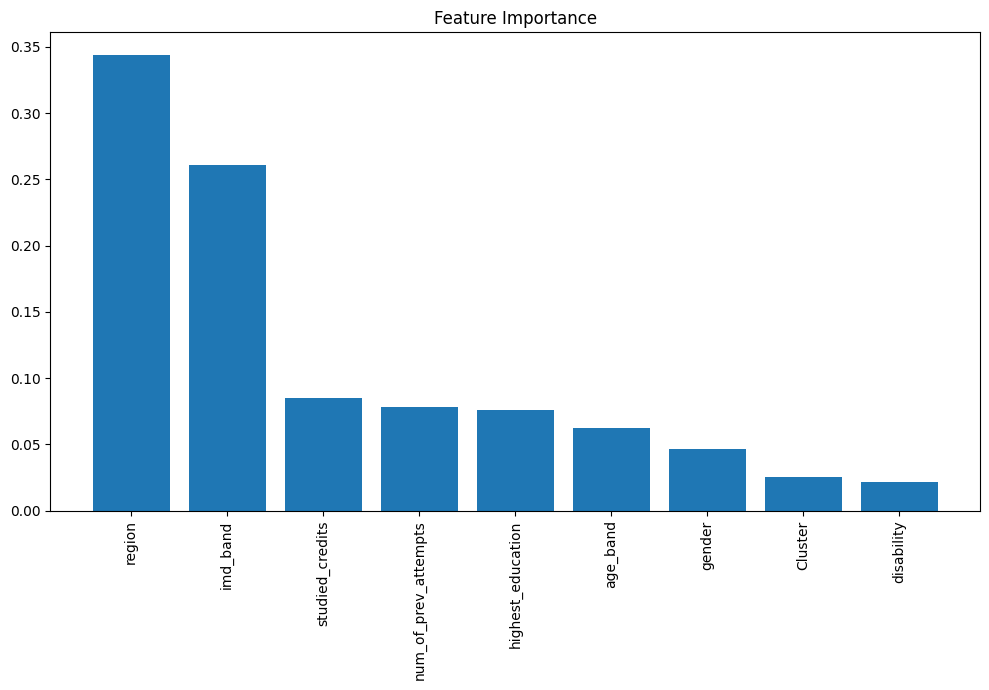

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title('Feature Importance')
plt.bar(range(X_train_fs.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_fs.shape[1]), X_train_fs.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic regression as an example model
log_reg = LogisticRegression()

rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 3 features
rfe.fit(X_train_fs, y_train_fs)

# Summarize selected features
selected_features_df = pd.DataFrame({
    'Feature': X_train_fs.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

print(selected_features_df[selected_features_df['Selected'] == True])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                Feature  Selected  Ranking
0                gender      True        1
1                region      True        1
4              age_band      True        1
5  num_of_prev_attempts      True        1
7            disability      True        1


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Applying the Chi-Squared Test
# Create and fit selector
chi2_selector = SelectKBest(chi2, k='all')  # 'all' can be replaced with any numeric value if you want to limit the number of features
X_kbest_features = chi2_selector.fit_transform(X, y)

# See the scores for each feature
chi_scores = chi2_selector.scores_

# Create a DataFrame with the scores and corresponding feature names
features_scores = pd.DataFrame({'Feature': X.columns, 'Score': chi_scores})
features_scores = features_scores.sort_values(by='Score', ascending=False)

# Display the features with their chi2 scores
print(features_scores)


                Feature         Score
6       studied_credits  13675.076818
3              imd_band    187.743799
7            disability    101.202111
8               Cluster     86.338999
5  num_of_prev_attempts     38.272695
0                gender     24.365087
4              age_band     16.652154
2     highest_education      9.268480
1                region      0.226390


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Initialize and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train_fs, y_train_fs)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

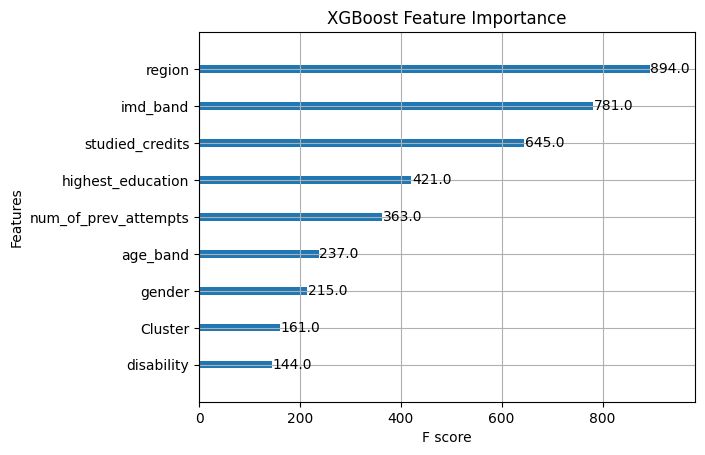

In [ ]:
# Plot feature importances
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

In [ ]:
# cat_selected_df = cat_df[['id_student','code_module','code_presentation','disability','imd_band','studied_credits','Cluster','final_result']]

In [ ]:
cat_selected_df = cat_df[['id_student','code_module','code_presentation',\
                          'region','imd_band','studied_credits','num_of_prev_attempts','Cluster',\
                          'final_result']]

In [ ]:
cat_selected_df

date,id_student,code_module,code_presentation,region,imd_band,studied_credits,num_of_prev_attempts,Cluster,final_result
0,6516,AAA,2014J,0.263204,8.0,60,0,4,0
1,8462,DDD,2013J,0.345149,3.0,90,0,3,1
2,8462,DDD,2014J,0.345149,3.0,60,1,4,1
3,11391,AAA,2013J,0.301198,9.0,240,0,2,0
4,23629,BBB,2013B,0.301198,2.0,60,2,4,0
...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0.347569,6.0,120,0,0,0
28170,2698535,CCC,2014B,0.251198,5.0,60,0,4,1
28171,2698535,EEE,2013J,0.251198,5.0,60,0,4,0
28172,2698577,BBB,2014J,0.251198,5.0,60,0,4,0


In [ ]:
cat_selected_df['final_result'].value_counts()

final_result
0    21189
1     6985
Name: count, dtype: int64

### Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame
X = cat_selected_df.drop(['final_result', 'id_student', 'code_module','code_presentation'], axis=1)  # Exclude the target variable
y = cat_selected_df['final_result']  # Target variable

# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42)

# # First, split into temp training and test set
# X_temp, X_test_rf, y_temp, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# # Then split the temp training set into actual training and validation sets
# X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [ ]:
print(X_train_rf.shape)
print(y_train_rf.shape)

(21130, 4)
(21130,)


In [ ]:
# print(X_val_rf.shape)
# print(y_val_rf.shape)

In [ ]:
print(X_test_rf.shape)
print(y_test_rf.shape)

(7044, 4)
(7044,)


In [ ]:
# Assuming df is your DataFrame
X = cat_selected_df.drop(['final_result', 'id_student', 'code_module','code_presentation'], axis=1)  # Exclude the target variable
y = cat_selected_df['final_result']  # Target variable

# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# # Predict on the validation set
# val_predictions = rf_model.predict(X_val_rf)
# val_accuracy = accuracy_score(y_val_rf, val_predictions)
# print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
# print(classification_report(y_val_rf, val_predictions))

# Predict on the test set
rf_predictions = rf_model.predict(X_test_rf)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test_rf, rf_predictions) * 100:.2f}%")
print(classification_report(y_test_rf, rf_predictions))

Test Accuracy: 74.42%
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      5333
           1       0.37      0.08      0.13      1711

    accuracy                           0.74      7044
   macro avg       0.57      0.52      0.49      7044
weighted avg       0.67      0.74      0.68      7044



In [ ]:
# Assuming df is your DataFrame
X = cat_selected_df.drop(['final_result', 'id_student', 'code_module','code_presentation'], axis=1)  # Exclude the target variable
y = cat_selected_df['final_result']  # Target variable

# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42)

global xgb_model

xgb_model = xgb.XGBClassifier(
    max_depth=3,          # maximum depth of each tree
    n_estimators=100,     # number of trees
    learning_rate=0.05,    # learning rate
    use_label_encoder=False,  # to avoid a deprecation warning from XGBoost regarding label encoding
    eval_metric='mlogloss'  # evaluation metric for multiclass classification
)
xgb_model.fit(X_train_rf, y_train_rf)

# # Predict on the validation set
# val_predictions = xgb_model.predict(X_val_rf)
# val_accuracy = accuracy_score(y_val_rf, val_predictions)
# print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
# print(classification_report(y_val_rf, val_predictions))


# Predictions
xgb_predictions = xgb_model.predict(X_test_rf)

# Evaluation
accuracy = accuracy_score(y_test_rf, xgb_predictions)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test_rf, xgb_predictions))

Test Accuracy: 75.74%
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5333
           1       0.52      0.02      0.04      1711

    accuracy                           0.76      7044
   macro avg       0.64      0.51      0.45      7044
weighted avg       0.70      0.76      0.66      7044



## 4.3) Meta-model combining two previous models

### Modeling

In [ ]:
from scipy.stats import mode

# Simple majority vote
final_predictions = mode(np.column_stack((tsf_predictions, xgb_predictions)), axis=1)[0]

In [ ]:
# Assuming the predictions are probabilities or continuous scores
ts_probs = ts_model.predict_proba(X_test_ts)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_rf)[:, 1]

In [ ]:
meta_features_logi = np.column_stack((ts_probs, xgb_probs))

In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model_logi = LogisticRegression()
meta_model_logi.fit(meta_features_logi, y_test_ts)

LogisticRegression()

In [ ]:
meta_predictions_logi = meta_model_logi.predict(meta_features_logi)

### Meta-Model Outcome

In [ ]:
accuracy = accuracy_score(y_test_ts, meta_predictions_logi)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_ts, meta_predictions_logi))

Accuracy: 84.99%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5333
           1       0.69      0.69      0.69      1711

    accuracy                           0.85      7044
   macro avg       0.80      0.79      0.80      7044
weighted avg       0.85      0.85      0.85      7044



In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_ts, meta_predictions_logi)
cnf_matrix

array([[4812,  521],
       [ 536, 1175]])

Text(0.5, 427.9555555555555, 'Predicted label')

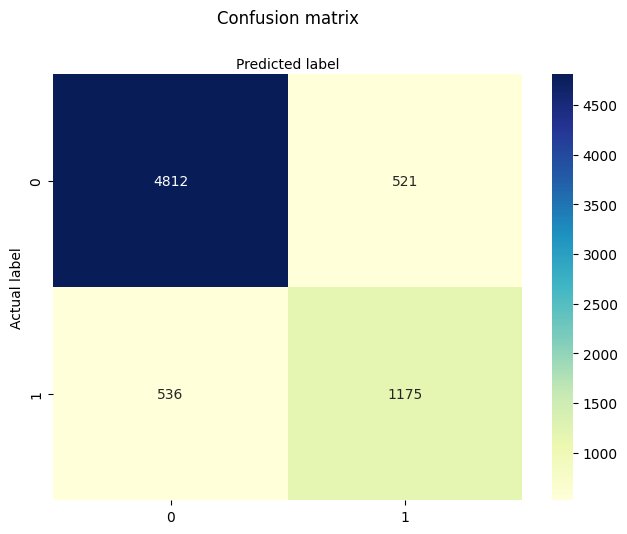

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

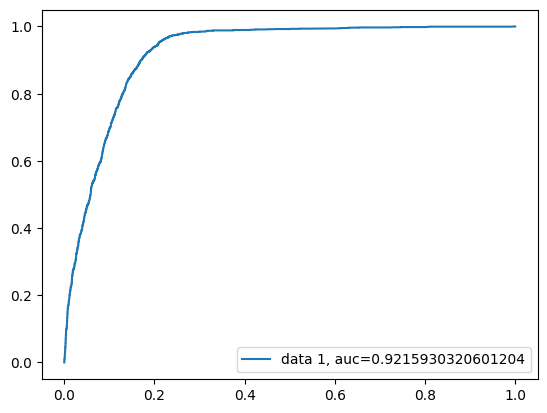

In [ ]:
y_pred_proba = meta_model_logi.predict_proba(meta_features_logi)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_ts, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ts, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [ ]:
# # Generate predictions
# model1_val_predictions = ts_model.predict(X_val_ts)
# model2_val_predictions = xgb_model.predict(X_val_rf)

# # Combine predictions to create new feature set for the meta model
# X_meta_val = np.column_stack((model1_val_predictions, model2_val_predictions))

In [ ]:
# meta_model = LogisticRegression()
# meta_model.fit(X_meta_val, y_val_rf)

In [ ]:
# # Base model predictions on the test set
# model1_test_predictions = ts_model.predict(X_test_ts)
# model2_test_predictions = xgb_model.predict(X_test_rf)

# # Combine predictions for the meta model
# X_meta_test = np.column_stack((model1_test_predictions, model2_test_predictions))

# # Final predictions from the meta model
# final_predictions = meta_model.predict(X_meta_test)

In [ ]:
# accuracy = accuracy_score(y_test_rf, final_predictions)
# print(f"Accuracy: {accuracy * 100:.2f}%")
# print(classification_report(y_test_ts, final_predictions))

In [ ]:
# from sklearn import metrics

# cnf_matrix = metrics.confusion_matrix(y_test_ts, final_predictions)
# cnf_matrix

In [ ]:
# class_names=['non-drop','drop'] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

In [ ]:
# y_pred_proba = meta_model.predict_proba(X_meta_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test_ts, y_pred_proba)
# auc = metrics.roc_auc_score(y_test_ts, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

### XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [ ]:
from scipy.stats import mode

# Simple majority vote
final_predictions = mode(np.column_stack((tsf_predictions, xgb_predictions)), axis=1)[0]

In [ ]:
# Assuming the predictions are probabilities or continuous scores
ts_probs = ts_model.predict_proba(X_test_ts)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_rf)[:, 1]

In [ ]:
meta_features_xgb = np.column_stack((ts_probs, xgb_probs))

In [ ]:
# # Generate predictions
# model1_val_predictions = ts_model.predict(X_val_ts)
# model2_val_predictions = xgb_model.predict(X_val_rf)

# # Combine predictions to create new feature set for the meta model
# X_meta_val = np.column_stack((model1_val_predictions, model2_val_predictions))

In [ ]:
meta_model_xgb = xgb.XGBClassifier(
    max_depth=3,          # maximum depth of each tree
    n_estimators=100,     # number of trees
    learning_rate=0.01,    # learning rate
    use_label_encoder=False,  # to avoid a deprecation warning from XGBoost regarding label encoding
    eval_metric='mlogloss'  # evaluation metric for multiclass classification
)
meta_model_xgb.fit(meta_features_xgb, y_test_ts)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
meta_predictions_xgb = meta_model_xgb.predict(meta_features_xgb)

In [ ]:
accuracy = accuracy_score(y_test_ts, meta_predictions_xgb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_ts, meta_predictions_xgb))

Accuracy: 83.29%
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5333
           1       0.74      0.48      0.58      1711

    accuracy                           0.83      7044
   macro avg       0.80      0.71      0.74      7044
weighted avg       0.82      0.83      0.82      7044



In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_ts, meta_predictions_xgb)
cnf_matrix

array([[5051,  282],
       [ 895,  816]])

Text(0.5, 427.9555555555555, 'Predicted label')

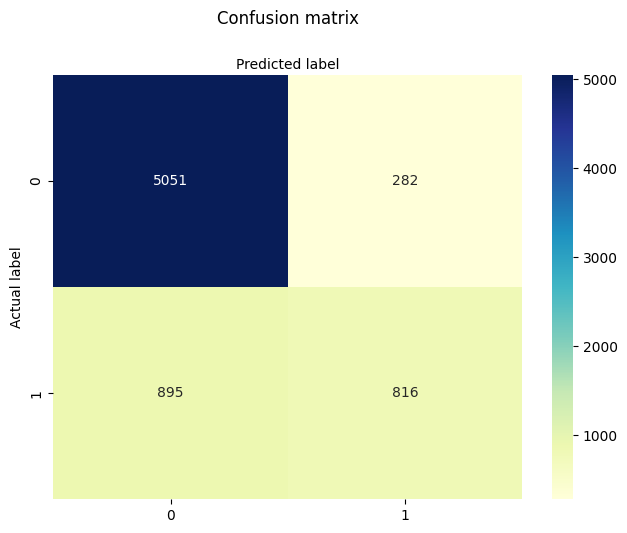

In [ ]:
class_names=['non-drop','drop'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

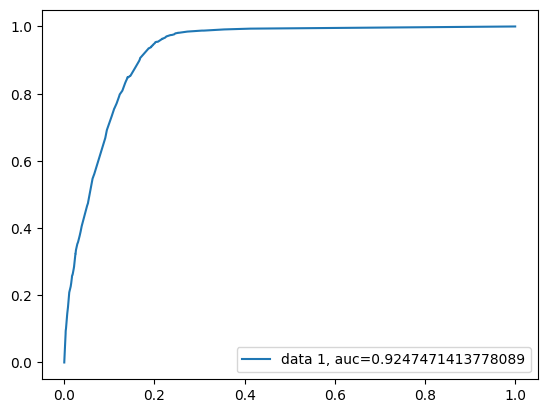

In [ ]:
y_pred_proba = meta_model_xgb.predict_proba(meta_features_xgb)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_ts, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ts, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

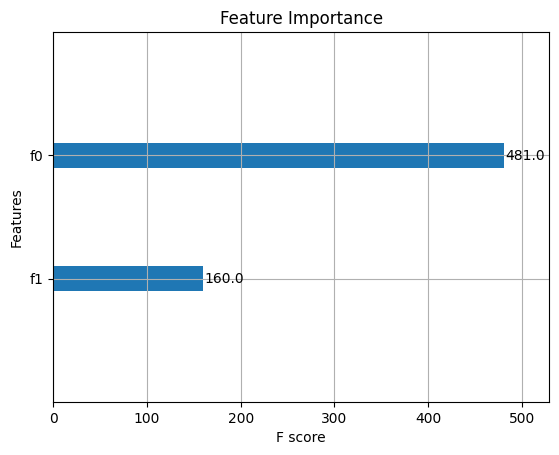

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(meta_model_xgb)
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate the meta-model
scores = cross_val_score(meta_model_xgb, X_meta_val, y_val_rf, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=meta_model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_meta_val, y_val_rf)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


# Early Dropout

In [ ]:
ts_pivot_df

date,final_result,-25.0,-24.0,-23.0,-22.0,-21.0,-20.0,-19.0,-18.0,-17.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,0,0.0,0.0,28.0,82.0,0.0,41.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28170,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28171,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28172,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd

# Manually creating each subset
ts_1 = ts_pivot_df[['final_result'] + [x for x in range(-25, 0) if x in ts_pivot_df.columns]]
ts_2 = ts_pivot_df[['final_result'] + [x for x in range(-25, 30) if x in ts_pivot_df.columns]]
ts_3 = ts_pivot_df[['final_result'] + [x for x in range(-25, 60) if x in ts_pivot_df.columns]]
ts_4 = ts_pivot_df[['final_result'] + [x for x in range(-25, 90) if x in ts_pivot_df.columns]]
ts_5 = ts_pivot_df[['final_result'] + [x for x in range(-25, 120) if x in ts_pivot_df.columns]]
ts_6 = ts_pivot_df[['final_result'] + [x for x in range(-25, 150) if x in ts_pivot_df.columns]]
ts_7 = ts_pivot_df[['final_result'] + [x for x in range(-25, 180) if x in ts_pivot_df.columns]]
ts_8 = ts_pivot_df[['final_result'] + [x for x in range(-25, 210) if x in ts_pivot_df.columns]]
ts_9 = ts_pivot_df[['final_result'] + [x for x in range(-25, 240) if x in ts_pivot_df.columns]]
ts_10 = ts_pivot_df[['final_result'] + [x for x in range(-25, 270) if x in ts_pivot_df.columns]]

In [ ]:
def process_dataset(df):

    # Identify time series columns (assuming they are all the columns with float type which represents days)
    time_series_columns = df.columns[df.dtypes == 'float64']

    # Reshape the DataFrame for sktime: transform each row's time series data into a 2D numpy array
    X = np.array(df[time_series_columns].apply(lambda row: row.values.reshape(1, -1), axis=1).tolist())

    y = df['final_result'].values  # target variable

    X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X, y, test_size=0.25, random_state=42)

    # # First, split into temp training and test set
    # X_temp, X_test_ts, y_temp, y_test_ts = train_test_split(X, y, test_size=0.2, random_state=42)

    # # Then split the temp training set into actual training and validation sets
    # X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Initialize the Time Series Forest classifier
    ts_model = TimeSeriesForestClassifier(n_estimators=100, n_jobs=-1)

    # Fit the model
    ts_model.fit(X_train_ts, y_train_ts)

    # # Predict and evaluate on the validation set
    # val_predictions = ts_model.predict(X_val_ts)
    # val_accuracy = accuracy_score(y_val_ts, val_predictions)

    # Predict on the test set
    tsf_predictions = ts_model.predict(X_test_ts)
    tsf_accuracy = accuracy_score(y_test_ts, tsf_predictions)

    return tsf_accuracy, classification_report(y_test_ts, tsf_predictions)

In [ ]:
datasets = [globals()[f'ts_{i}'] for i in range(1, 11)]

In [ ]:
results = {}
for i, df in enumerate(datasets, start=1):
    print(f"Processing dataset {i}...")
    test_acc, class_report = process_dataset(df)
    results[f'dataset_{i}'] = {
        'Test Accuracy': test_acc,
        'Classification Report': class_report
    }

Processing dataset 1...
Processing dataset 2...
Processing dataset 3...
Processing dataset 4...
Processing dataset 5...
Processing dataset 6...
Processing dataset 7...
Processing dataset 8...
Processing dataset 9...
Processing dataset 10...


In [ ]:
for name, result in results.items():
    print(f"\nResults for {name}:")
    # print(f"Validation Accuracy: {result['Validation Accuracy']:.2f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.2f}")
    print("Classification Report:")
    print(result['Classification Report'])


Results for dataset_1:
Test Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.85      5333
           1       0.33      0.04      0.07      1711

    accuracy                           0.75      7044
   macro avg       0.54      0.51      0.46      7044
weighted avg       0.65      0.75      0.66      7044


Results for dataset_2:
Test Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      5333
           1       0.67      0.16      0.25      1711

    accuracy                           0.78      7044
   macro avg       0.73      0.57      0.56      7044
weighted avg       0.76      0.78      0.72      7044


Results for dataset_3:
Test Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5333
           1       0.69      0.34   

In [ ]:
def process_meta_model(df):
  # Generate predictions
  # model1_val_predictions = ts_model.predict(X_val_ts)
  # model2_val_predictions = xgb_model.predict(X_val_rf)

  # # Combine predictions to create new feature set for the meta model
  # X_meta_val = np.column_stack((model1_val_predictions, model2_val_predictions))

  # Simple majority vote
  final_predictions = mode(np.column_stack((tsf_predictions, rf_predictions)), axis=1)[0]

  # Assuming the predictions are probabilities or continuous scores
  ts_probs = ts_model.predict_proba(X_test_ts)[:, 1]  # Get probability of class 1
  xgb_probs = xgb_model.predict_proba(X_test_rf)[:, 1]

  meta_features = np.column_stack((ts_probs, xgb_probs))

  # meta_model = LogisticRegression()
  # meta_model.fit(meta_features, y_test_rf)

  # meta_model = xgb.XGBClassifier(
  #     max_depth=3,          # maximum depth of each tree
  #     n_estimators=100,     # number of trees
  #     learning_rate=0.0,    # learning rate
  #     use_label_encoder=False,  # to avoid a deprecation warning from XGBoost regarding label encoding
  #     eval_metric='mlogloss'  # evaluation metric for multiclass classification
  #     )
  # meta_model.fit(meta_features, y_test_rf)

  meta_predictions = meta_model.predict(meta_features)

  # # Predict and evaluate on the validation set
  # val_predictions = meta_model.predict(X_meta_val)
  # val_accuracy = accuracy_score(y_val_rf, val_predictions)

  final_accuracy = accuracy_score(y_test_rf, meta_predictions)

  return(final_accuracy, classification_report(y_test_rf, final_predictions))

In [ ]:
results = {}
for i, df in enumerate(datasets, start=1):
    print(f"Processing dataset {i}...")
    test_acc, class_report = process_meta_model(df)
    results[f'dataset_{i}'] = {
        'Test Accuracy': test_acc,
        'Classification Report': class_report
    }

Processing dataset 1...
Processing dataset 2...
Processing dataset 3...
Processing dataset 4...
Processing dataset 5...
Processing dataset 6...
Processing dataset 7...
Processing dataset 8...
Processing dataset 9...
Processing dataset 10...


In [ ]:
for name, result in results.items():
    print(f"\nResults for {name}:")
    print(f"Test Accuracy: {result['Test Accuracy']}")
    print("Classification Report:")
    print(result['Classification Report'])


Results for dataset_1:
Test Accuracy: 0.8283645655877342
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5333
           1       0.85      0.01      0.03      1711

    accuracy                           0.76      7044
   macro avg       0.81      0.51      0.44      7044
weighted avg       0.78      0.76      0.66      7044


Results for dataset_2:
Test Accuracy: 0.8283645655877342
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5333
           1       0.85      0.01      0.03      1711

    accuracy                           0.76      7044
   macro avg       0.81      0.51      0.44      7044
weighted avg       0.78      0.76      0.66      7044


Results for dataset_3:
Test Accuracy: 0.8283645655877342
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     